<a href="https://colab.research.google.com/github/sourin7/practice/blob/master/Trading_strategy_using_MACD_%26_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description This program uses the moving average convergence/divergence(MACD) crossover to determine when to buy and sell stock


In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from google.colab import files
uploaded=files.upload()

Saving datasets_19256_25044_AAPL.csv to datasets_19256_25044_AAPL.csv


In [ ]:
#Store the data into a df
df=pd.read_csv('datasets_19256_25044_AAPL.csv')
#Set the date to be the index
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


NameError: ignored

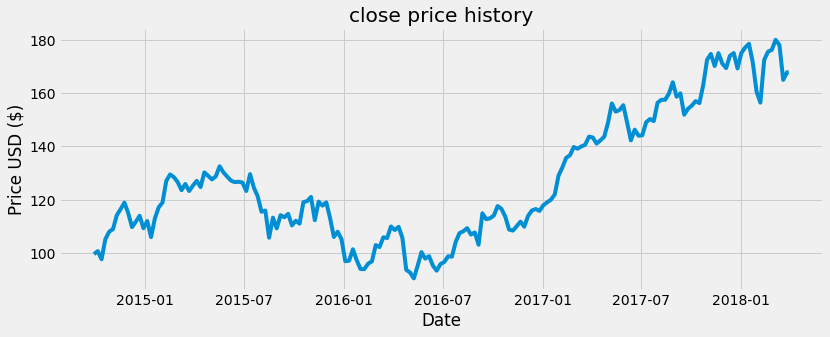

In [ ]:
#Visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='close')
plt.title('close price history')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
Plt.show()


In [ ]:
#Calculate the MACD and signal lines
#Calculate the short term exponential moving average(EMA)
ShortEMA=df.Close.ewm(span=12,adjust=False,).mean()
#Calculate the long term exponential moving average(EMA)
longEMA=df.Close.ewm(span=26,adjust=False).mean()
#Calculate the MACD line
MACD=ShortEMA-longEMA
#Calculate the signal line
signal=MACD.ewm(span=9,adjust=False,).mean()

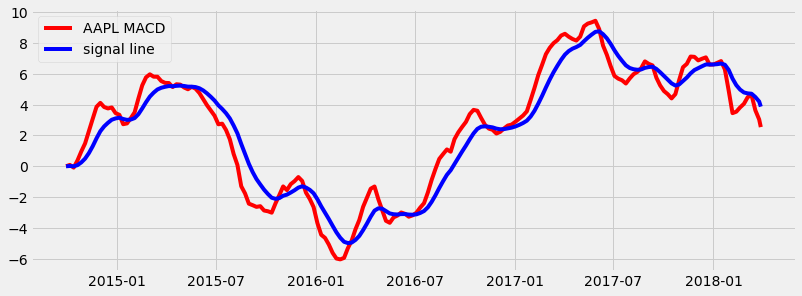

In [ ]:
#Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index,MACD,label='AAPL MACD', color='red')
plt.plot(df.index,signal,label='signal line',color='blue')
plt.legend()
plt.show()

In [ ]:
#Create new columns for the data
df['MACD']=MACD
df['Signal line']=signal
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,Buy_signal_price,Sell_signal_price
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0.000000,0.000000,NaN,NaN
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.088547,0.017709,100.730003,NaN
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.087191,-0.003271,NaN,97.669998
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.378396,0.073063,105.220001,NaN
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.960626,0.250576,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,4.490403,4.731596,179.979996,NaN
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,4.624384,4.710154,NaN,NaN
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,3.633237,4.494770,NaN,164.940002
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,3.041845,4.204185,NaN,NaN


In [ ]:
#Create function to indicate when to buy and sell
def buy_sell(signal):
  Buy=[]
  Sell=[]
  flag=-1
  for i in range(0,len(signal)):
    if signal['MACD'][i]>signal['Signal line'][i]:
      Sell.append(np.nan)
      if flag!=1:
        Buy.append(signal['Close'][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i]<signal['Signal line'][i]:
      Buy.append(np.nan)
      if flag!=0:
        Sell.append(signal['Close'][i])
        flag=0
      else:
        Sell.append(np.nan) 
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return(Buy,Sell)    


In [ ]:
#Create buy and sell column
a=buy_sell(df)
df['Buy_signal_price']=a[0]
df['Sell_signal_price']=a[1]
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,Buy_signal_price,Sell_signal_price
2014-09-29,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0.000000,0.000000,NaN,NaN
2014-10-06,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.088547,0.017709,100.730003,NaN
2014-10-13,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.087191,-0.003271,NaN,97.669998
2014-10-20,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.378396,0.073063,105.220001,NaN
2014-10-27,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.960626,0.250576,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-05,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,4.490403,4.731596,NaN,NaN
2018-03-12,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,4.624384,4.710154,NaN,NaN
2018-03-19,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,3.633237,4.494770,NaN,NaN
2018-03-26,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,3.041845,4.204185,NaN,NaN


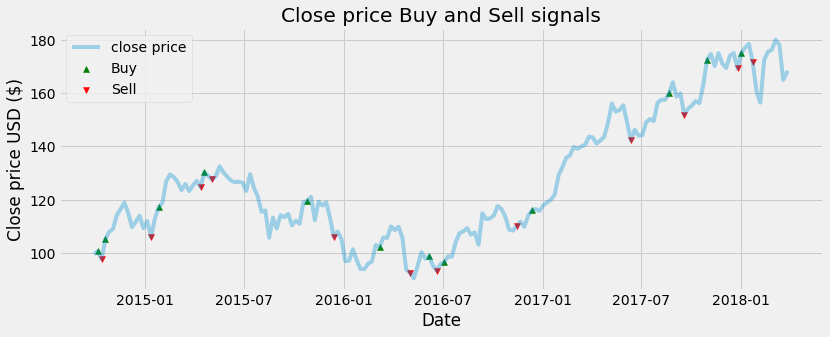

In [ ]:
#Visually show the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index,df['Buy_signal_price'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['Sell_signal_price'],color='red',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'], label='close price',alpha=0.35)
plt.title('Close price Buy and Sell signals')
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.legend()
plt.show()